In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Q1. Hospital patients admission Insights

## a) Patients who are in cardiology department who admitted through Emergency

In [50]:
hos_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")

admission_way = hos_data.groupby('admission_ward')['admission_way'].sum()
admission_way

Cardio_emergency = hos_data[(hos_data['admission_way'] == 'Emergency') & (hos_data['admission_ward'] == 'Cardiology')]

Cardio_emergency_count = len(Cardio_emergency)
Cardio_emergency_count

total_rows = len(hos_data)
total_rows

Cardio_emergency_percent = (Cardio_emergency_count/total_rows) * 100 
Cardio_emergency_percent

print("Patients admitted in Cardiology department through Emergency : {:.2f}%".format(Cardio_emergency_percent))

Patients admitted in Cardiology department through Emergency : 34.26%


##### *Result-  34.26% of Patients admitted through Emergency in Cardiology ward*

## b) Patients who are in ICU ward through Emergency admission

In [51]:
ICU_emergency = hos_data[(hos_data['admission_way'] == 'Emergency') & (hos_data['admission_ward'] == 'ICU')]

ICU_emergency_count = len(ICU_emergency)
ICU_emergency_count

total_rows = len(hos_data)
total_rows

ICU_emergency_percent = (ICU_emergency_count/total_rows) * 100 
ICU_emergency_percent

print("Patients admitted in ICU department through Emergency : {:.2f}%".format(ICU_emergency_percent))

Patients admitted in ICU department through Emergency : 0.65%


#####  *Result - 0.65% of Patients admitted through Emergency in ICU ward* 

# Q2. Clinical Outcomes 

## a) Survival Estimation

In [52]:
data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
data.head()

alive_patients = data[data['outcome_during_hospitalization'] == 'Alive']
alive_patients

alive_patients_count = len(alive_patients)
alive_patients_count

total_rows = len(data)
total_rows

Alive_rate = (alive_patients_count/total_rows) * 100 
Alive_rate

print("Survival Rate is : {:.2f}%".format(Alive_rate))

Survival Rate is : 94.12%


## b) Discharge against order Rate 

In [53]:
data2 = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
data2.head()

dao_patients = data2[data2['outcome_during_hospitalization'] == 'DischargeAgainstOrder']
dao_patients

dao = dao_patients[['inpatient_number', 'outcome_during_hospitalization']]
dao

dao_patients_count = len(dao_patients)
dao_patients_count

#total_rows = len(data2)
#total_rows

dao_rate = (dao_patients_count/total_rows) * 100 
dao_rate

print("Discharge Against Order Rate is : {:.2f}%".format(dao_rate))

Discharge Against Order Rate is : 5.33%


## c) Mortality estimation

In [54]:

dead_patients = hos_data[hos_data['outcome_during_hospitalization'] == 'Dead']
dead_patients

dead_patients_count = len(dead_patients)
dead_patients_count

total_rows = len(hos_data)
total_rows

Mortality_rate = (dead_patients_count/total_rows) * 100 
Mortality_rate

print("Mortality Rate is : {:.2f}%".format(Mortality_rate))

Mortality Rate is : 0.55%


##### *Result- 0.55% is the estimated mortality rate from this dataset*

#  Q3. Identify the patient with maximum time hospitalized

In [55]:
from datetime import datetime, timedelta

hos_data['Discharge_date'] = hos_data['Admission_date'] + pd.to_timedelta(data['dischargeDay'], unit='D')
hos_data['Discharge_date']

#hos_data[['dischargeDay','Admission_date','Discharge_date']]  # new Discharge_date column added to view the difference of days 

hos_data.describe().loc['min':'max']

,inpatient_number,visit_times,dischargeDay,Admission_date,death_within_28_days,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,Discharge_date
min,722128.00,1.0,1.0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,0.0,1.0,2016-01-09 00:00:00
25%,763164.50,1.0,6.0,2016-12-14 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.00,42.0,0.0,42.0,2016-12-25 00:00:00
50%,798758.00,1.0,8.0,2017-12-23 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.50,83.0,0.0,83.0,2018-01-02 12:00:00
75%,829399.75,1.0,10.0,2018-12-26 06:00:00,0.0,0.0,0.0,0.0,0.0,1.0,18.75,166.0,1.0,166.0,2019-01-07 00:00:00
max,905720.00,5.0,123.0,2019-12-30 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,350.00,2280.0,1.0,2280.0,2020-03-17 00:00:00


# Q3(b). what is the longest hospital stay for patients?



In [56]:
Discharge = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name ="Hospitalization_Discharge")
max_stay=Discharge['dischargeDay'].max(axis=0)


max_stay

123

#### Comment - longest hospital stay duration is 123

# Q4. Complications and Symptoms among patients with heart failure

In [57]:
data_ph = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="PatientHistory")

data_cardia = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="CardiacComplications")

merged = data_ph.merge(data_cardia[['inpatient_number','congestive_heart_failure','myocardial_infarction','peripheral_vascular_disease','type_of_heart_failure']])
merged.head(2)

## checking on comlications of symptom combinations

merged.pivot_table(index='congestive_heart_failure', columns='diabetes', values ='CCI_score',aggfunc= 'count', margins=True)

diabetes,0,1,All
congestive_heart_failure,,,
0,113,23,136
1,1429,438,1867
All,1542,461,2003


##### 438 patients recorded with diabetes who are underwent with congestive heart failure

### 4b) Pulmonary disease with myocardial infraction analysis

In [58]:
merged.pivot_table(index='myocardial_infarction', columns='Chronic_obstructive_pulmonary_disease', values ='CCI_score',aggfunc= 'count', margins=True)

Chronic_obstructive_pulmonary_disease,0,1,All
myocardial_infarction,,,
0,1643,219,1862
1,127,14,141
All,1770,233,2003


##### 14 patients recorded with Chronic obstructive pulmonary disease and  myocardial infraction condition which significantly impacts patients health and quality of life.

## 4c) Peripheral vascular disease with Type II respiratory failure analysis

In [59]:
merged.pivot_table(index='peripheral_vascular_disease', columns='type_II_respiratory_failure', values ='CCI_score',aggfunc= 'count', margins=True)

type_II_respiratory_failure,NonTypeII,TypeII,All
peripheral_vascular_disease,,,
0,1799,103,1902
1,90,11,101
All,1889,114,2003


##### 11 patients recorded with combination of peripheral vascular disease and TypeII respiratory failure. 
##### This can leads to increase risk of pulmnory hypertension.

### Insights -- Each of this symptoms has unique challenges when interact with each other and affect the prognosis and over all healthy outcomes.

# Q5. Using the donut chart to calculate the number of patients having diseases(each column) in patient history

In [63]:
data8= pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='PatientHistory', usecols= 'B:N,Q')
data9= data8.sum()
data9        ## Run  each cell to see the output 

cerebrovascular_disease                      150.0
dementia                                     115.0
Chronic_obstructive_pulmonary_disease        233.0
connective_tissue_disease                      4.0
peptic_ulcer_disease                          45.0
diabetes                                     466.0
moderate_to_severe_chronic_kidney_disease    474.0
hemiplegia                                    12.0
leukemia                                       0.0
malignant_lymphoma                             1.0
solid_tumor                                   39.0
liver_disease                                 84.0
AIDS                                           4.0
acute_renal_failure                            7.0
dtype: float64

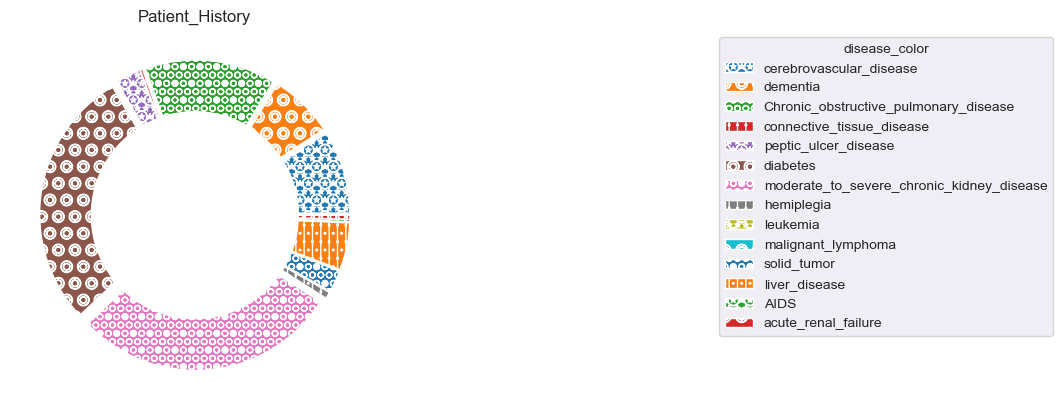

In [62]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05)
plt.pie(data9,pctdistance=1.2,explode=explode,hatch=['**O', 'oO', 'O.O', '.||.'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Patient_History')
plt.legend(labels=data9.index,bbox_to_anchor=(1.9,1), loc="upper left" , title="disease_color")
plt.show()


####  *Comment-- moderate to severe chronic kidney disease condition has highest numbers in the cardiac patients and the least is malignant lymphoma and there is no one in leukemia*

# Q6. Which drug prescribed most in MI, any variation in drug list for other conditions?
#### Run each cell to view the output please!

In [64]:
Cardiac= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="CardiacComplications", usecols='A,D,E,F,G')
Drug= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Patient_Precriptions")

In [65]:
columns = Cardiac[['inpatient_number','congestive_heart_failure','peripheral_vascular_disease','myocardial_infarction','type_of_heart_failure']]

M_C= columns[(columns['myocardial_infarction']==1) | (columns['peripheral_vascular_disease']==1) & (columns['congestive_heart_failure']==1) | (columns['type_of_heart_failure']=='Both') ]
M_C

Merge1 = pd.merge(M_C[['inpatient_number','myocardial_infarction','peripheral_vascular_disease','congestive_heart_failure',
                          'type_of_heart_failure']],Drug[['inpatient_number','Drug_name']]) 

MI = Merge1[Merge1['myocardial_infarction']==1]
MI.Drug_name.value_counts()

Drug_name
Furosemide injection                                134
Spironolactone tablet                               124
Furosemide tablet                                   111
Atorvastatin calcium tablet                          96
Aspirin enteric-coated tablet                        94
Deslanoside injection                                77
Clopidogrel Hydrogen Sulphate tablet                 77
Meglumine Adenosine Cyclophosphate for injection     73
Milrinone injection                                  62
Isosorbide Mononitrate Sustained Release tablet      54
Digoxin tablet                                       50
Metoprolol Succinate Sustained-release tablet        38
sulfotanshinone sodium injection                     34
Benazepril hydrochloride tablet                      32
Nitroglycerin injection                              30
Shenfu injection                                     28
Valsartan Dispersible tablet                         24
metoprolol tartrate injection         

#### Furosemide injection, Spironolactone tablet,Furosemide tablet are the three most common prescriptions prescribed in the Myocardial condition patients.


In [66]:
melt1= pd.melt(Merge1, id_vars=['myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease'], 
              value_vars=['Drug_name'], ignore_index=True, value_name= 'Drug_name_',var_name ='Prescriptions')


In [67]:
pivot= pd.pivot_table(melt1, index= 'Drug_name_', values= ['myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease'],aggfunc='sum')
pivot

,congestive_heart_failure,myocardial_infarction,peripheral_vascular_disease
Drug_name_,,,
Aspirin enteric-coated tablet,678,94,55
Atorvastatin calcium tablet,565,96,61
Benazepril hydrochloride tablet,305,32,15
Clopidogrel Hydrogen Sulphate tablet,272,77,24
Deslanoside injection,747,77,53
Digoxin tablet,711,50,43
Dobutamine hydrochloride injection,14,1,1
Enoxaparin Sodium injection,83,13,6
Furosemide injection,1235,134,91


#### There is no variation in the drug list among different cardiac conditions, eventhough there is slight changes in the count of patients. The three top medications Furosemide injection, Spironolactone tablet,Furosemide tablet remained in the top. and the least prescribed medications are Isoprenaline Hydrochloride injection and Dobutamine hydrochloride injection


# Q7. Pie Chart with cardiac conditions

In [68]:
Cardiac= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="CardiacComplications", usecols='A,D,E,F,G')
Cardiac.sum()

inpatient_number                                                      1601877066
myocardial_infarction                                                        143
congestive_heart_failure                                                    1872
peripheral_vascular_disease                                                  101
type_of_heart_failure          BothBothBothBothBothBothBothBothBothBothBothBo...
dtype: object

In [69]:
def func(row):
    if row['type_of_heart_failure'] == 'Both' or row['type_of_heart_failure'] == 'Left' or row['type_of_heart_failure'] == 'Right' :
        return 1
Cardiac['Ventricular_failure'] = Cardiac.apply(func, axis=1)
Cardiac

,inpatient_number,myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease,type_of_heart_failure,Ventricular_failure
0,857781,0,0,0,Both,1
1,743087,0,0,0,Both,1
2,866418,0,0,0,Both,1
3,775928,0,0,0,Both,1
4,810128,0,0,0,Both,1
...,...,...,...,...,...,...
2003,740689,0,1,0,Both,1
2004,734280,0,1,0,Both,1
2005,781004,0,1,0,Both,1
2006,744870,0,1,0,Both,1


#### Converting type of heart failure column to numeric and coded all types- Left, right and Both into 1

In [70]:
Cardiac_C= Cardiac[['myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease','Ventricular_failure']]
Pie = Cardiac_C.sum()

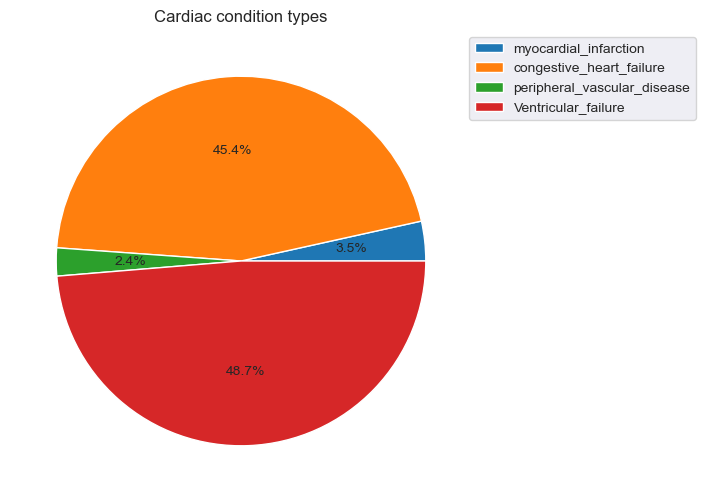

In [71]:
plt.figure(figsize=(6, 6))
plt.title("Cardiac condition types")
Pie.plot(kind='pie', autopct='%1.1f%%', labeldistance= 1, labels= None  )
plt.legend(labels=Pie.index, loc='upper right',bbox_to_anchor=(1.5, 1))

#### Comment- Ventricular heart failure is the most prevalent condition in our dataset followed by Congestive heart failure

## Q7(b). Which age category is affected most with Cardiac Problems? 

In [72]:
Demo_data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name ="Demography")

Demo_data['ageCat'].value_counts(ascending=False)
Demo_data['ageCat'].head(1)

0    69-79
Name: ageCat, dtype: object

#### Comment - The most affected age category is 69-79

# Q8. show the relation of D-dimer,prothrombin time ratio and Fibrinogen?

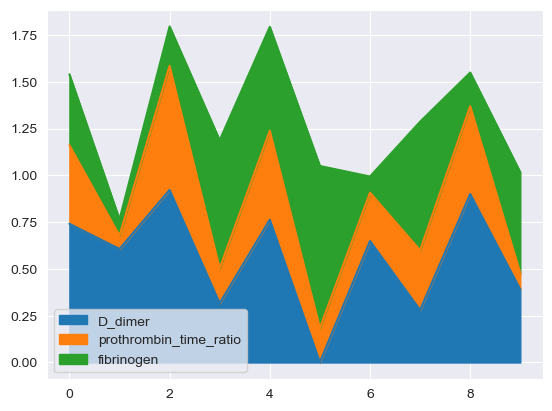

In [73]:
Lab_data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name ="Labs")
Lab_data = pd.DataFrame(np.random.rand(10, 3), columns=['D_dimer', 'prothrombin_time_ratio', 'fibrinogen'])

Lab_data.plot.area();

#### Comment - The relation is interdependence- we could see here, the values are almost following the same curve in all three variables- D_dimer (protein), prothrombin ratio time and fibrinogen. All three variables are related to blood clot time.

# Q9. To find relationships with bilurubin levels  for heart failure for outcomes of patients

In [74]:
import pandas as pd
Lab_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Labs")
Lab_data.head(3)

bilirubin_columns = Lab_data[['inpatient_number','direct_bilirubin','total_bilirubin']]
bilirubin_columns.head(2)

cardia_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="CardiacComplications")
cardia_data.head(2)

CHF = cardia_data[['inpatient_number','congestive_heart_failure']]
CHF.head(2)

merge_1 = pd.merge(CHF,bilirubin_columns, on='inpatient_number')
merge_1.head(2)

hos_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
hos_data.head(2)

outcome = hos_data[['inpatient_number','outcome_during_hospitalization']]
outcome

merge_2 = pd.merge(merge_1, outcome, on='inpatient_number')

merge_2.sample(5)   

# table to analyse the insights belong to bilirubin varaibles and heart failure and to identify the severity of prognosis with patients 


,inpatient_number,congestive_heart_failure,direct_bilirubin,total_bilirubin,outcome_during_hospitalization
586,836661,1,4.4,14.4,Alive
1260,812653,1,21.5,44.0,Alive
1695,862739,1,NaN,NaN,Alive
1557,742960,1,4.6,17.7,Alive
1033,820789,1,3.5,8.2,DischargeAgainstOrder


<Axes: xlabel='total_bilirubin', ylabel='outcome_during_hospitalization'>

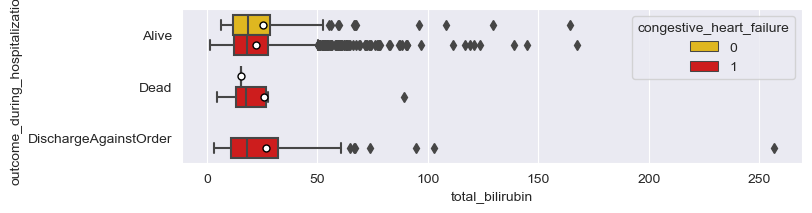

In [75]:
# To display the outliers of patients outcome during hospitalization

plt.figure(figsize=(8,2))
                
sns.boxplot(x='total_bilirubin',y='outcome_during_hospitalization',hue='congestive_heart_failure',data= merge_2, showmeans= True,
           meanprops={"marker":"o","markerfacecolor":"white","markersize":"5","markeredgecolor":"black"}, palette ='hot_r')

#### Comment - From this plot, showing the mean marker(median values),upper quartile, maximum data value points and outliers for each outcome

#  Q10. What percent of patients had NYHA_function classification of 4?

In [76]:
Cardiac_Complications = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="CardiacComplications")


Total_count_of_4 = Cardiac_Complications.groupby('NYHA_cardiac_function_classification').size()[4]
total_number_of_patients = len(Cardiac_Complications)

#calculate percentage of 4 from total number of patients

percentage_of_4 = ((Total_count_of_4 / total_number_of_patients) * 100).round(2)

# print percentage value
print(percentage_of_4)


30.68


#### *Comment: 30.68% patients had severe symptoms of heart failure*

#  Q11.  Find the count of patients who were discharged from ICU with a GCS score of less than 10


In [77]:
Hosp= pd.read_excel("Cardiac_outcomes.xlsx", sheet_name= "Hospitalization_Discharge")


Response_data = pd.read_excel("Cardiac_outcomes.xlsx", sheet_name="Responsivenes")

Final_data=pd.merge(Hosp[['inpatient_number','discharge_department']],Response_data[['inpatient_number','GCS']])
Final_data.head(2)

,inpatient_number,discharge_department,GCS
0,857781,Cardiology,15
1,743087,Cardiology,15


In [78]:
# count of patient with GCS score<10 and discharge departmwnt = ICU

patient_count=Final_data[(Final_data['discharge_department']=='ICU') & (Final_data['GCS'] <10)]
              
print(patient_count.value_counts())

inpatient_number  discharge_department  GCS
815140            ICU                   3      1
Name: count, dtype: int64


#### There is 1  patient discharged from ICU with GCS <10 , 
#### Patients with a GCS score <10 at ICU discharge have a poor chance of 1 year favourable outcome.

# Q12. Patients with most common Lab tests taken 

In [79]:
labs_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Labs")
labs_data.head(2)

transposed_data = labs_data.set_index('inpatient_number').transpose()
transposed_data.sample(5)

inpatient_number,857781,743087,866418,775928,810128,823318,844094,787530,795420,829801,...,818185,804209,756045,726701,754589,740689,734280,781004,744870,791864
neutrophil_count,7.050,3.730,11.540,1.220,4.280,9.450,5.310,5.270,3.73,5.280,...,2.370,10.890,2.320,5.110,3.82,2.83,3.450,4.09,7.900,3.720
carbon_dioxide_binding_capacity,21.600,26.500,21.600,21.100,22.800,22.100,19.300,27.700,33.60,26.100,...,24.500,24.300,34.500,24.000,19.80,24.60,23.500,24.00,19.300,17.300
neutrophil_ratio,0.746,0.702,0.887,0.559,0.697,0.873,0.716,0.719,0.88,0.793,...,0.726,0.782,0.555,0.743,0.61,0.70,0.754,0.76,0.813,0.697
reduced_hemoglobin,3.400,NaN,NaN,NaN,NaN,NaN,6.600,NaN,2.50,12.600,...,0.600,NaN,NaN,0.600,NaN,NaN,NaN,NaN,3.900,NaN
thrombin_time,17.000,18.400,14.900,18.300,16.400,14.600,17.600,17.100,14.80,17.400,...,17.900,NaN,16.200,17.500,17.40,17.80,17.900,20.40,16.000,18.000


In [80]:
tests_count = transposed_data.sum(axis=1)   # To view the total counts of the tests taken 
tests_count

body_temperature             73124.30
pulse                       171152.00
respiration                  38324.00
systolic_blood_pressure     263162.00
diastolic_blood_pressure    153759.00
                              ...    
partial_oxygen_pressure     107365.00
oxyhemoglobin                94179.20
anion_gap                    13924.30
free_calcium                  1102.62
total_hemoglobin            123096.00
Length: 106, dtype: float64

In [82]:
### Result

tests_count.max()
#print(tests_count.max())

most_labtests_taken = tests_count.idxmax()
most_labtests_taken

print("The most common Labs test taken from the inpatients is:", most_labtests_taken )

print("Max freqency of this drug:",tests_count.max() )


The most common Labs test taken from the inpatients is: brain_natriuretic_peptide
Max freqency of this drug: 2526302.71


#### *Result :  The most common Lab test taken is BNP*

# Q13. BNP Test Analysis -- brain_natriuretic_peptide

###  Natriuretic Peptides (e.g., Brain Natriuretic Peptide - BNP)
#### These peptides are released by the heart in response to increased pressure and volume, often indicating heart failure or other cardiac abnormalities.
#### brain.natriuretic.peptide (pg/ml); reference range: 0 -100

In [1]:
import pandas as pd

labs_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Labs")
labs_data.head(2)

BNP = labs_data[['inpatient_number','brain_natriuretic_peptide']]
BNP.head(3)

# brain.natriuretic.peptide (pg/ml); reference range: 0 -100

# Age
demo_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography")
demo_data.head(2)

age =  demo_data[['inpatient_number','ageCat','gender']]
age.head(2)


# Medical condition
Cardia_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="CardiacComplications")
Cardia_data.head(2)

CHF = Cardia_data[['inpatient_number','congestive_heart_failure']]
CHF.head(2)

# Merging 
BNP_merge = pd.merge(BNP, age, on='inpatient_number').merge(CHF, on='inpatient_number')
BNP_merge.sample(3)

,inpatient_number,brain_natriuretic_peptide,ageCat,gender,congestive_heart_failure
504,849047,5000.00,79-89,Female,1
1899,737639,1785.74,69-79,Male,1
514,730971,3388.84,69-79,Female,1


<Axes: xlabel='ageCat', ylabel='count'>

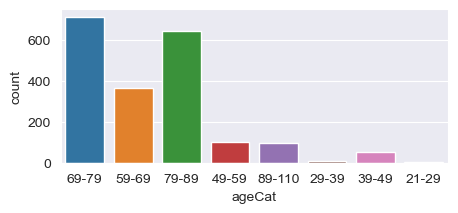

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')

plt.figure(figsize=(5,2))

sns.countplot(x='ageCat',data= BNP_merge)  # to check on counts

## Q13b)

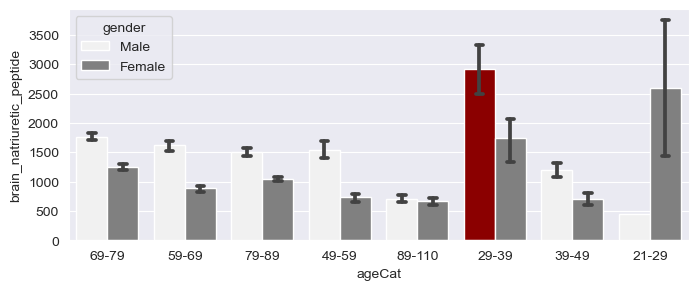

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,3))
ax = sns.barplot(x='ageCat', y='brain_natriuretic_peptide',hue='gender',data= BNP_merge, estimator = 'mean', errorbar= ('ci',50), capsize=0.1, color ='grey')

patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('darkred')

##### *Height of the bar represents mean, vertical line its an error bar represents 95% confidence interval fall in this range*

#### *From the plot above, 29-39 Male age group patients has the elevation* 
#### Elevated levels of BNP >100pg/ml

## Q13c)

In [5]:
# Patients with heart failure estimation 
CHF_patients = CHF[CHF['congestive_heart_failure']==1]
CHF_patients   #1872 patients identified with heart failure from the data 


# B-type natriuretic peptide BNP test
elevated_BNP = BNP_merge[BNP_merge['brain_natriuretic_peptide'] > 100]  # Range:0-100pg/ml considered normal
elevated_BNP   # 1826 patients recorde with elevated BNP



#Merging BNP & CHF
elevated_BNP_CHF = elevated_BNP[elevated_BNP['inpatient_number'].isin(CHF_patients['inpatient_number'])]
elevated_BNP_CHF  

#1699 patients identified with elevated BNP and also with heart failure medical complication

,inpatient_number,brain_natriuretic_peptide,ageCat,gender,congestive_heart_failure
11,748109,136.60,89-110,Female,1
13,744167,5000.00,49-59,Male,1
17,825016,145.25,79-89,Female,1
20,764082,949.05,69-79,Female,1
25,818671,1348.03,69-79,Female,1
...,...,...,...,...,...
2003,740689,1056.28,79-89,Female,1
2004,734280,503.82,79-89,Female,1
2005,781004,548.97,39-49,Male,1
2006,744870,2614.12,49-59,Male,1


#### *1699 patients identified with elevated BNP and with heart failure medical complication*

# Q13d)

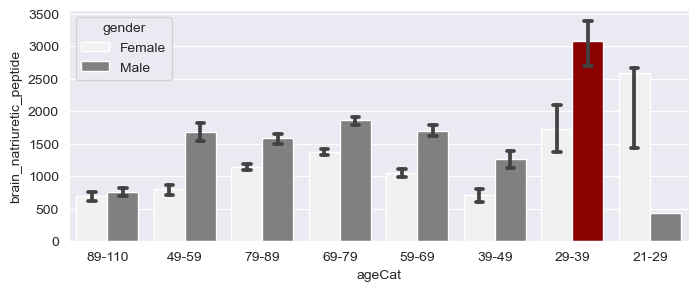

In [6]:
import numpy as np
plt.figure(figsize=(8,3))
ax = sns.barplot(x='ageCat', y='brain_natriuretic_peptide',hue='gender',data= elevated_BNP_CHF, estimator = 'mean', errorbar= ('ci',50), capsize=0.1, color ='grey')

patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('darkred')

### *29-39 age group Male patients are fallen under most critical condition with elevated BNP might has led to heart failure from the dataset* 

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Q14. To check on elevated BNP patients with CHF density outcome during hospitalization

In [8]:

hosdis_data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")

outcome = hosdis_data[['inpatient_number','outcome_during_hospitalization']]
outcome.head(2)

# To merge outcome with elevated BNP CHF
# elevated_BNP_CHF 

elevated_BNP_CHF_outcome = outcome.merge(elevated_BNP_CHF)
elevated_BNP_CHF_outcome.sample(5)


,inpatient_number,outcome_during_hospitalization,brain_natriuretic_peptide,ageCat,gender,congestive_heart_failure
920,732792,Alive,731.09,89-110,Female,1
1214,775739,Alive,186.76,79-89,Male,1
696,751832,Alive,1911.76,69-79,Female,1
34,729949,Alive,2127.80,79-89,Male,1
1658,799600,DischargeAgainstOrder,1926.14,79-89,Male,1


<Figure size 700x500 with 0 Axes>

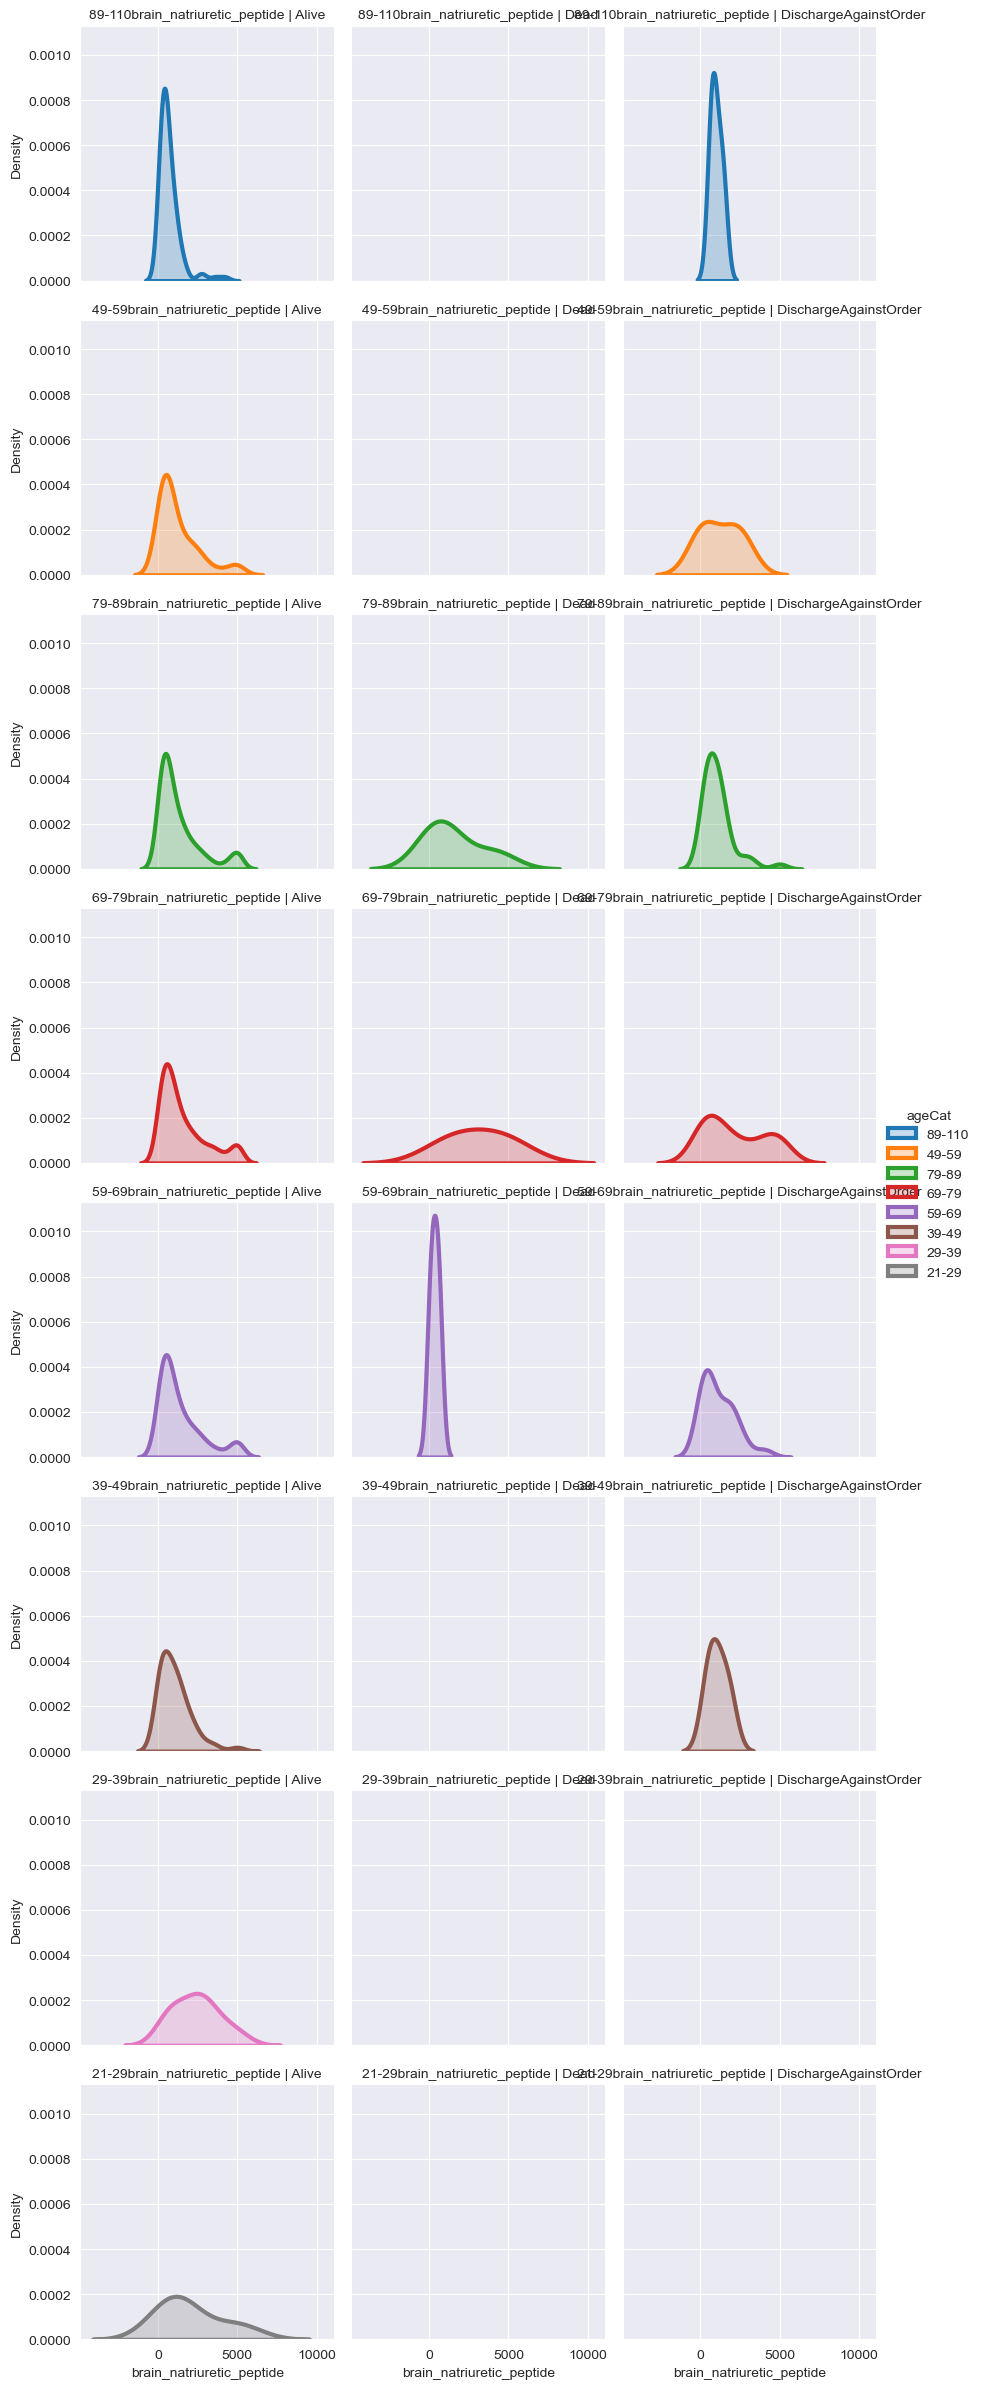

In [10]:
plt.figure(figsize=(7,5))

plot = sns.FacetGrid(elevated_BNP_CHF_outcome, col= 'outcome_during_hospitalization',row='ageCat', hue='ageCat') #sharey= False, ylim= (0,5000))
plot.map_dataframe(sns.kdeplot, x ='brain_natriuretic_peptide', lw=3, shade=True)
#plot.set_axis_labels('outcome_during_hospitalization')
plot.set_titles(row_template= '{row_name}brain_natriuretic_peptide', col_template= '{col_name}')
plot.add_legend();

#### *69-89 age group of BNP Heart failure patients has the highest outcome of Alive when compared*
#### *21-39 age group of BNP heart failure patients has least outcome*

# Q15. How many emergency patients are recovered and discharged to home within 10 days?

In [11]:
dfile = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")

adata= np.where((dfile['admission_way'] == 'Emergency') & (dfile['dischargeDay'] <= 10) & (dfile['DestinationDischarge']=='Home'))

dfile.loc[adata]

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,death_within_28_days,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months
20,764082,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,5,2018-11-28,...,0,0,0,1,0,1,NaN,38.0,1.0,38.0
33,766383,Home,ICU,Emergency,Cardiology,1,NaN,OxygenTherapy,4,2016-01-17,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
37,793147,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,7,2016-11-22,...,0,0,0,0,0,1,NaN,162.0,1.0,162.0
44,857297,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,9,2018-01-31,...,0,1,0,1,0,1,NaN,18.0,1.0,18.0
45,727376,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,9,2018-10-25,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,739217,Home,Cardiology,Emergency,Cardiology,1,NaN,AmbientAir,8,2019-02-13,...,0,0,0,0,0,0,NaN,186.0,0.0,186.0
1984,861442,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,7,2018-07-03,...,0,0,0,1,0,1,NaN,57.0,1.0,57.0
1989,807293,Home,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,10,2019-07-30,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
1994,816947,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,5,2016-05-01,...,0,0,0,0,0,0,NaN,213.0,0.0,213.0


#### Comment- total number of 429 patients are admitted through Emergency and recovered and discharge to home wthin 10 days.

# Q16.provide those patient whose CCI Score is greater than 4 and cholestrol is between 2 and 5.

In [12]:
dfile = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="PatientHistory")
vfile = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Labs")

merged1 = pd.merge(dfile,vfile , on='inpatient_number')

merged1 = merged1[merged1['CCI_score'] > 4]
merged1 = merged1[merged1['cholesterol'].between(2,5)]
merged1

,inpatient_number,cerebrovascular_disease,dementia,Chronic_obstructive_pulmonary_disease,connective_tissue_disease,peptic_ulcer_disease,diabetes,moderate_to_severe_chronic_kidney_disease,hemiplegia,leukemia,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
274,738813,1,0,0,0,0.0,1,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,790433,1,0,0,0,0.0,1,1.0,0,0,...,-6.6,19.2,0.3,37.0,98.0,124.0,96.6,17.3,1.12,73.0
1145,780166,0,0,0,0,0.0,1,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1321,739403,1,0,0,0,0.0,1,0.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,767282,1,0,0,0,0.0,1,1.0,0,0,...,-4.8,18.3,0.2,37.0,98.0,135.0,97.8,15.2,1.09,98.0
1485,849079,1,0,1,0,0.0,1,1.0,0,0,...,1.4,26.3,0.1,37.0,93.0,66.0,92.2,14.9,1.09,101.0
1936,757006,1,0,0,0,0.0,0,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,820600,1,0,0,0,1.0,1,0.0,0,0,...,4.0,27.8,0.4,37.0,99.0,142.0,97.9,12.2,1.05,56.0
1976,777237,0,0,1,0,0.0,1,1.0,0,0,...,-4.7,15.6,0.4,37.0,99.0,148.0,98.5,16.8,1.08,144.0
1983,852097,1,0,0,0,0.0,1,1.0,1,0,...,-2.4,19.9,0.3,37.0,95.0,75.0,94.3,12.1,1.05,116.0
